# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [13]:
df = pd.read_csv('dataset_clustering.csv')
df.head()

,gross_binned,budget_per_minute,likes_per_review,weighted_imdb_score,budget_score_ratio,likes_score_ratio,cluster
0,200M+,2.500000e+04,0.0,157.5,2.000000e+05,0.0,2
1,10M-50M,1.019802e+06,0.0,1017.6,1.609375e+07,0.0,3
2,10M-50M,5.752212e+05,0.0,1470.0,8.666666e+06,0.0,3
3,50M-100M,8.333333e+05,0.0,561.0,1.287879e+07,0.0,0
4,200M+,7.835821e+05,0.0,1386.9,1.567164e+07,0.0,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [14]:
X = df.drop('cluster', axis=1)
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Jumlah data latih:', len(X_train))
print('Jumlah data uji:', len(X_test))

Jumlah data latih: 3057
Jumlah data uji: 765


In [15]:
label_encoder = LabelEncoder()

label_encoder.fit(X_train['gross_binned'].unique())

X_train['gross_binned_encoded'] = label_encoder.transform(X_train['gross_binned'])
X_test['gross_binned_encoded'] = label_encoder.transform(X_test['gross_binned'])

X_train = X_train.drop('gross_binned', axis=1)
X_test = X_test.drop('gross_binned', axis=1)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [16]:
# Model Random Forest
model_ranfor = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
model_ranfor.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Model K-Nearest Neighbors
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

## Random Forest Classifier
  yaitu algoritma machine learning berbasis ensemble yang menggabungkan banyak pohon keputusan untuk menghasilkan prediksi yang lebih akurat dan stabil.

  n_estimators=100: Jumlah pohon keputusan yang digunakan dalam model. Semakin banyak pohon, umumnya semakin stabil hasilnya, tapi bisa lebih lambat.

  random_state=42: Digunakan untuk memastikan hasil model tetap sama setiap kali dijalankan (agar reproducible).

  Model ini bekerja dengan membuat banyak pohon dari sampel acak data dan menggabungkan hasil prediksi masing-masing pohon (voting mayoritas).

## K-Nearest Neighbors (KNN) Classifier

  yaitu algoritma klasifikasi berbasis jarak. Model ini bekerja dengan mencari sejumlah tetangga terdekat dari data latih untuk menentukan kelas suatu data baru.

  n_neighbors=5: Menentukan jumlah tetangga terdekat yang dipertimbangkan dalam menentukan kelas. Dalam hal ini, model akan melihat 5 data terdekat dari data uji, lalu memilih kelas yang paling banyak muncul di antara kelima tetangga tersebut.

  Model ini tidak melakukan pelatihan secara eksplisit, tapi menyimpan seluruh data latih, dan saat prediksi dilakukan, model menghitung jarak dari data baru ke data latih untuk menentukan kelasnya.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [19]:
# Define scoring metrics
scoring = ['accuracy', 'f1_macro', 'recall_macro']  # Use 'macro' averaging for multi-class

# Cross-validation for Random Forest
scores_ranfor = cross_validate(model_ranfor, X_train, y_train, cv=5, scoring=scoring)

# Cross-validation for KNN
scores_knn = cross_validate(model_knn, X_train, y_train, cv=5, scoring=scoring)

# Print results
print("Random Forest Cross-Validation Scores:")
print(f"Accuracy: {scores_ranfor['test_accuracy'].mean():.4f} (+/- {scores_ranfor['test_accuracy'].std():.4f})")
print(f"F1 Score: {scores_ranfor['test_f1_macro'].mean():.4f} (+/- {scores_ranfor['test_f1_macro'].std():.4f})")
print(f"Recall: {scores_ranfor['test_recall_macro'].mean():.4f} (+/- {scores_ranfor['test_recall_macro'].std():.4f})")

print("\nKNN Cross-Validation Scores:")
print(f"Accuracy: {scores_knn['test_accuracy'].mean():.4f} (+/- {scores_knn['test_accuracy'].std():.4f})")
print(f"F1 Score: {scores_knn['test_f1_macro'].mean():.4f} (+/- {scores_knn['test_f1_macro'].std():.4f})")
print(f"Recall: {scores_knn['test_recall_macro'].mean():.4f} (+/- {scores_knn['test_recall_macro'].std():.4f})")


Random Forest Cross-Validation Scores:
Accuracy: 0.9905 (+/- 0.0048)
F1 Score: 0.9886 (+/- 0.0066)
Recall: 0.9867 (+/- 0.0073)

KNN Cross-Validation Scores:
Accuracy: 0.4537 (+/- 0.0135)
F1 Score: 0.3471 (+/- 0.0069)
Recall: 0.3547 (+/- 0.0066)


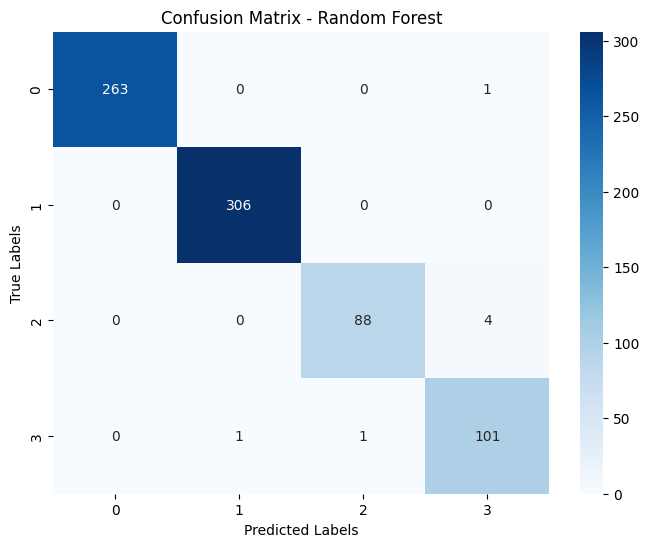

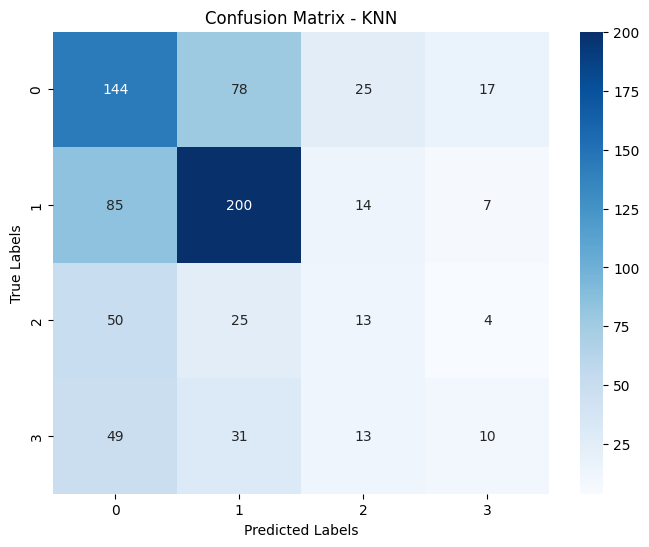

In [20]:
# Predict using the trained models
y_pred_ranfor = model_ranfor.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

# Confusion Matrix for Random Forest
cm_ranfor = confusion_matrix(y_test, y_pred_ranfor)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ranfor, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Random Forest
Confusion Matrix:
  - Random Forest menghasilkan prediksi yang sangat akurat.
  - Hampir semua data diklasifikasikan dengan benar:
    - Label 0 diprediksi benar sebanyak 263 kali, hanya 1 kesalahan
    - Label 1 diprediksi benar sebanyak 306 kali tanpa kesalahan.
    - Label 2 dan 3 juga diklasifikasikan dengan baik, hanya sedikit kesalahan.
  - Hampir tidak ada prediksi silang antar kelas.

Cross-Validation Scores:
  - Accuracy: 0.9905 (+/- 0.0048)
  - F1 Score: 0.9886 (+/- 0.0066)
  - Recall: 0.9867 (+/- 0.0073)

Interpretasi:
  - Random Forest sangat berhasil dalam klasifikasi ini.
  - Hasil confusion matrix yang rapi memperkuat hasil cross-validation: hampir semua instance diklasifikasikan dengan benar.

## K-Nearest Neighbors (KNN)
Confusion Matrix:
  - KNN menghasilkan banyak kesalahan klasifikasi:
    - Label 0 banyak salah diklasifikasikan menjadi label 1 (78 kali), label 2 (25 kali), dan label 3 (17 kali).
    - Begitu juga untuk label lainnya, banyak terjadi salah klasifikasi silang antar kelas.

Cross-Validation Scores:
  - Accuracy: 0.4537 (+/- 0.0135)
  - F1 Score: 0.3471 (+/- 0.0069)
  - Recall: 0.3547 (+/- 0.0066)

Interpretasi:
  - KNN tidak cocok untuk dataset ini.
  - Banyak data yang overlapping atau feature space-nya tidak cocok untuk pendekatan berbasis jarak seperti KNN.
  - KNN mengalami kesulitan membedakan antar kelas dengan baik.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

## Random Forest
Analisis Hasil Evaluasi:
- Random Forest menunjukkan performa yang sangat baik dengan akurasi, F1 Score, dan recall yang semuanya di atas 98%.
- Hasil confusion matrix memperlihatkan bahwa hampir seluruh data diklasifikasikan dengan benar, dengan kesalahan yang sangat minimal.
- Model mampu mempertahankan performa yang stabil (variasi cross-validation sangat kecil), sehingga hasilnya konsisten terhadap perubahan data.

## K-Nearest Neighbors (KNN)
Analisis Hasil Evaluasi:
- KNN menunjukkan performa yang buruk, dengan akurasi hanya sekitar 45%, F1 Score 34%, dan recall 35%.
- Confusion matrix memperlihatkan banyak kesalahan klasifikasi silang antar kelas.
- Model KNN tampaknya tidak mampu membedakan data dengan baik pada dataset ini, kemungkinan besar karena feature space yang tidak ideal untuk metode berbasis jarak.


## **f. Rekomendasi Tindakan Lanjutan:**


## Untuk Random Forest:
- Gunakan Random Forest sebagai model utama untuk produksi atau implementasi lebih lanjut.
- Lakukan hyperparameter tuning (misalnya dengan GridSearchCV atau RandomizedSearchCV) untuk mencoba meningkatkan performa lebih lanjut, walaupun peningkatannya mungkin kecil.
- Analisis feature importance dari Random Forest untuk mendapatkan insight tambahan tentang faktor-faktor yang paling berpengaruh dalam prediksi.
- Monitoring performa model secara berkala ketika diterapkan di data baru, untuk memastikan model tidak mengalami degradasi performa (concept drift).

### Untuk KNN:
- Tidak menggunakan KNN untuk model utama pada dataset ini karena performanya jauh lebih rendah dibandingkan Random Forest.
- Jika tetap ingin memperbaiki KNN, langkah yang bisa dicoba:
  - Scaling data (menggunakan StandardScaler atau MinMaxScaler) karena KNN sangat sensitif terhadap perbedaan skala feature.
  - Mencoba nilai K yang berbeda (hyperparameter tuning) untuk mencari K terbaik.
  - Feature selection atau dimensionality reduction (seperti PCA) untuk membuat jarak antar titik lebih representatif.
- Namun, karena gap performa yang terlalu besar, lebih praktis untuk mengalihkan fokus ke model yang lebih efektif seperti Random Forest.

